In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
models = pd.read_csv('/datasets/query_1.csv') #модели самолетов и количество рейсов

In [3]:
cities = pd.read_csv('/datasets/query_3.csv') #города и среднее количество рейсов в день

In [4]:
festivals = pd.read_csv('/datasets/query_last.csv') #продажи билетов по неделям в июле-сентябре 2018 г.

## Работа с таблицами _models_ и _cities_

__Проверка корректности данных__

In [5]:
models.info()
models.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [6]:
models.isnull().sum()

model             0
flights_amount    0
dtype: int64

In [7]:
models.duplicated().sum()

0

In [8]:
cities.info()
cities.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [9]:
cities.duplicated().sum()

0

In [10]:
cities.isnull().sum()

city               0
average_flights    0
dtype: int64

In [11]:
cities['average_flights'] = cities['average_flights'].round(1)

__Десятка городов с максимальным средним количеством рейсов в день__

In [12]:
cities.sort_values(by='average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.8
70,Санкт-Петербург,31.2
54,Новосибирск,17.3
33,Красноярск,11.6
20,Екатеринбург,11.3
67,Ростов-на-Дону,10.2
63,Пермь,10.1
10,Брянск,10.0
74,Сочи,9.6
84,Ульяновск,9.6


Москва ожидаемо возглавляет список городов с наибольшим количеством рейсов в день. Здесь этот показатель составляет почти 130 рейсов, более чем в 4 раза больше чем у города на 2-м месте - Санкт-Петербурга. Тройку лидеров замыкает Новосибирск, который принимает около 17 рейсов ежедневно.

Остальные города-лидеры принимают примерно одинаковое количество рейсов - 9-10, список лидеров замыкает Ульяновск.

__Модели самолетов и количество рейсов__

In [13]:
models = models.sort_values(by='flights_amount')

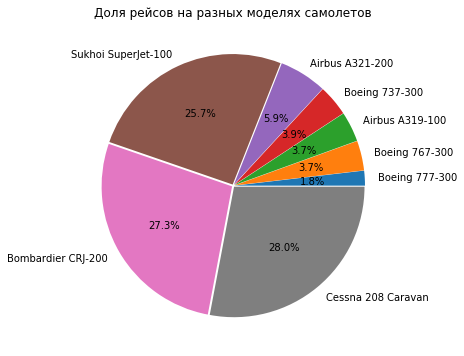

In [14]:
fig, ax = plt.subplots(figsize=(6,6))
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01) 
ax.pie(models['flights_amount'], explode=explode, labels=models['model'], autopct='%1.1f%%')
ax.set_title('Доля рейсов на разных моделях самолетов')

plt.show()

Мы видим явную тройку лидеров: 80% рейсов совершаются на самолетах моделей Cessna 208 Caravan, Bombardier CRJ-200 Sukhoi и Superjet-100.

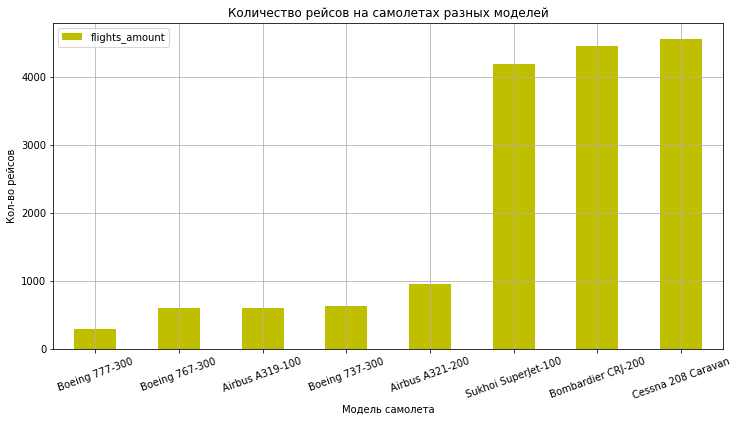

In [15]:
ax = models.plot.bar(x='model', y='flights_amount', rot=20, figsize=(12,6), grid=True, color='y')
ax.set_title('Количество рейсов на самолетах разных моделей')
ax.set(ylabel='Кол-во рейсов', xlabel='Модель самолета')
plt.show()

__Города и количество рейсов__

В таблице cities 101 запись, количество рейсов в разные города отличаются в разы, наиболее наглядной здесь будет диаграмма размаха.

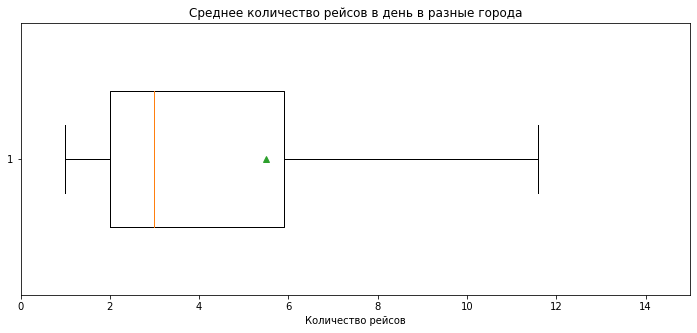

In [16]:
plt1, ax1 = plt.subplots(figsize=(12,5))
ax1.set_title('Среднее количество рейсов в день в разные города')
ax1.set_xlabel('Количество рейсов')
ax1.boxplot(cities['average_flights'],vert=False,showmeans=True, widths=0.5)
plt.xlim(0,15)

plt.show()

In [17]:
cities = cities.sort_values(by='average_flights')

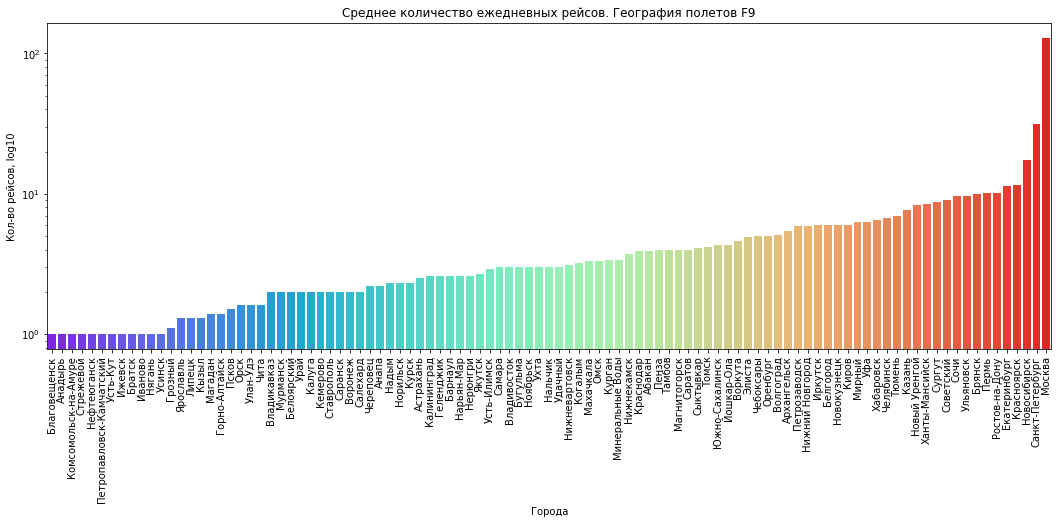

In [18]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.barplot(x=cities['city'], y=cities['average_flights'], palette="rainbow")
ax.set_yscale('log')
ax.set_title("Среднее количество ежедневных рейсов. География полетов F9")
ax.set_xlabel('Города')
ax.set_xticklabels(labels=cities['city'], rotation=90)
ax.set_ylabel('Кол-во рейсов, log10')
plt.show()

__Топ-10 городов и количество рейсов__

В данном случае мы будем использовать столбчатую диаграмму, которая наглядно покажет среднее количество рейсов в день в разных городах. Так как эта величина для Москвы превосходит величины в других города в 10 раз, имеет смысл использовать логарифмическую шкалу.

In [19]:
cities_top10 = cities.sort_values(by='average_flights', ascending=False).head(10).reset_index(drop=True)

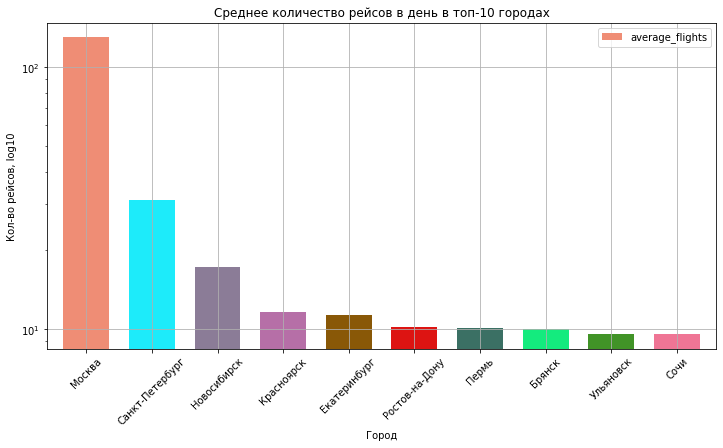

In [20]:
color_rectangle = np.random.rand(10, 3)

ax = cities_top10.plot(x='city', y='average_flights', kind='bar', figsize=(12,6), grid=True,\
                       title='Среднее количество рейсов в день в топ-10 городах', \
                       width= 0.7, color = color_rectangle, rot=45,tick_label=True)
ax.set(ylabel='Кол-во рейсов, log10', xlabel='Город')
ax.set_yscale('log')
plt.show()

Как мы уже отмечали ранее, города в 1-й десятке существенно отличаются по количеству прибывающих рейсов. Выделяется тройка лидеров - Москва, Санкт-Петербург, Новосибирск, тогда как в остальных городах среднее количество рейсов примерно одинаково.

## Спрос на билеты во время "фестивальных" и обычных недель

In [21]:
festivals.info()
festivals.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [22]:
festivals.loc[festivals['festival_week'] > 0, 'festival_week'] = True
festivals['festival_week'] = festivals['festival_week'].fillna(False)

In [23]:
festivals.duplicated().sum()

0

Сохраним в отдельных переменных количество купленных билетов в "фестивальные" и обычные недели.

H0: уровни продаж билетов в "фестивальные" и обычные недели статистически не различаются.

H1: уровни продажи билетов в "фестивальные" и обычные недели различны

Уровень значимости: 5% задается исходя из общепринятой практики выбора критического значения.

In [24]:
normal_weeks = festivals[festivals['festival_week'] == False]['ticket_amount']
festival_weeks = festivals[festivals['festival_week'] == True]['ticket_amount']

In [25]:
results = st.ttest_ind(normal_weeks, festival_weeks)

In [26]:
print('p-значение =', round(results.pvalue, 3))
if results.pvalue >= 0.05:
    print('Не найдено статистически значимых различий между продажами билетов в "фестивальные" и обычные недели.')
else:
    print('Различия между продажами в "фестивальные" и обычные недели статистически значимы при уровне значимости 5%. \
    По-другому: вероятность того, что продажи в "фестивальные" и обычные недели не отличаются, составляет менее 5%.')

p-значение = 0.097
Не найдено статистически значимых различий между продажами билетов в "фестивальные" и обычные недели.


__Заключение__
Представляется, что для анализа спроса на билеты в зависимости от проходящих фестивалей, не достаточно изучить продажи за 10 недель одного года. Следует посмотреть динамику спроса за несколько лет, а также желательно брать данные не по Москве, спрос на которую обусловлен множеством факторов, а среднему региональному центру.